### 1. Introduction and Problem Statement
### 2. Data Collection and Requirement
### 3. Data Exploration and Cleaning
### 4. Feature Engineering
### 5. Model Building and Evaluation
### 6. Insights and Visualizations
### 8. Deployement

### Introduction and Problem Statement
Stroke is a leading cause of death and disability globally, making early risk prediction essential for timely medical intervention and improved outcomes. This project aims to build a **binary classification model to predict** the probability of stroke based on various health and lifestyle features.

Accurate stroke prediction can support healthcare professionals in identifying high-risk individuals, prioritizing preventive care, and optimizing resources. This highlights the potential of machine learning to address critical healthcare challenges and improve patient outcomes.

dataset: https://www.kaggle.com/competitions/playground-series-s3e2/data

#### Dataset Features
The dataset used for stroke prediction includes the following features:

id: Unique identifier for each individual.
                     
gender: Gender of the individual (Male, Female).
                     
age: Age of the individual (numerical value).
                     
hypertension: Binary indicator of whether the individual has hypertension (1 = Yes, 0 = No).
                     
heart_disease: Binary indicator of whether the individual has heart disease (1 = Yes, 0 = No).
                     
ever_married: Marital status (Yes, No).
                     
work_type: Type of work (Private, Self-employed, Government, Children).
                     
Residence_type: Type of residence (Urban, Rural).
                     
avg_glucose_level: Average glucose level (numerical value).
                     
bmi: Body Mass Index (numerical value).
                     
smoking_status: Smoking status (Never, Former, Current, Unknown).
                     
stroke: Target variable indicating whether the individual had a stroke (1 = Yes, 0 = No).

### 2. Data Collection and Requirement

In [43]:
import seaborn as sns  # Visualization library for heatmaps
import matplotlib.pyplot as plt  # Visualization library for plotting
import pandas as pd  # Data manipulation and analysis
import numpy as np  # Numerical computations

# Import necessary libraries
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, VotingClassifier  # Models and ensemble methods
from sklearn.linear_model import LogisticRegression  # Logistic Regression model
from sklearn.tree import DecisionTreeClassifier  # Decision Tree classifier
from sklearn.svm import SVC  # Support Vector Machine classifier
from sklearn.neighbors import KNeighborsClassifier  # K-Nearest Neighbors classifier
from sklearn.naive_bayes import GaussianNB  # Naive Bayes classifier
from sklearn.metrics import (
    classification_report,
    confusion_matrix,
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
)  # Evaluation metrics
from sklearn.model_selection import train_test_split  # For splitting dataset into training and testing
from xgboost import XGBClassifier  # XGBoost classifier
from imblearn.over_sampling import SMOTE  # For handling imbalanced datasets using oversampling

# Import libraries for encoding, pipelines, and configuration
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn import set_config

In [44]:
train_df=pd.read_csv(r"Dataset/train.csv")
test_df=pd.read_csv(r"Dataset/test.csv")

In [45]:
train_df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,0,Male,28.0,0,0,Yes,Private,Urban,79.53,31.1,never smoked,0
1,1,Male,33.0,0,0,Yes,Private,Rural,78.44,23.9,formerly smoked,0
2,2,Female,42.0,0,0,Yes,Private,Rural,103.00,40.3,Unknown,0
3,3,Male,56.0,0,0,Yes,Private,Urban,64.87,28.8,never smoked,0
4,4,Female,24.0,0,0,No,Private,Rural,73.36,28.8,never smoked,0


In [46]:
# Display basic information
print("Dataset Overview:")
print(f"Shape: {train_df.shape}\n")

Dataset Overview:
Shape: (15304, 12)



In [47]:
print("Data Info:")
train_df.info()

Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15304 entries, 0 to 15303
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 15304 non-null  int64  
 1   gender             15304 non-null  object 
 2   age                15304 non-null  float64
 3   hypertension       15304 non-null  int64  
 4   heart_disease      15304 non-null  int64  
 5   ever_married       15304 non-null  object 
 6   work_type          15304 non-null  object 
 7   Residence_type     15304 non-null  object 
 8   avg_glucose_level  15304 non-null  float64
 9   bmi                15304 non-null  float64
 10  smoking_status     15304 non-null  object 
 11  stroke             15304 non-null  int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 1.4+ MB


In [48]:
print("\nDescriptive Statistics:")
print(train_df.describe())


Descriptive Statistics:
                 id           age  hypertension  heart_disease  \
count  15304.000000  15304.000000  15304.000000   15304.000000   
mean    7651.500000     41.417708      0.049726       0.023327   
std     4418.028595     21.444673      0.217384       0.150946   
min        0.000000      0.080000      0.000000       0.000000   
25%     3825.750000     26.000000      0.000000       0.000000   
50%     7651.500000     43.000000      0.000000       0.000000   
75%    11477.250000     57.000000      0.000000       0.000000   
max    15303.000000     82.000000      1.000000       1.000000   

       avg_glucose_level           bmi        stroke  
count       15304.000000  15304.000000  15304.000000  
mean           89.039853     28.112721      0.041296  
std            25.476102      6.722315      0.198981  
min            55.220000     10.300000      0.000000  
25%            74.900000     23.500000      0.000000  
50%            85.120000     27.600000      0.0000

##### Shape of the Dataset:

15,304 rows and 12 columns.
##### Column Overview:

Categorical Features: gender, ever_married, work_type, Residence_type, smoking_status.

Numerical Features: age, avg_glucose_level, bmi.

Binary Features: hypertension, heart_disease, stroke (target).

##### Descriptive Statistics:

age ranges from 1 to 82.0 years with a mean of 41.42 years.
    
avg_glucose_level ranges from 55.22 to 267.6 with a mean of 89.04.

bmi ranges from 10.3 to 80.1 with a mean of 28.11.

stroke target is imbalanced, as its mean (0.041) indicates ~4% positive cases.

## 3. Data Exploration and Cleaning
##### 3.1 Data Cleaning
##### 3.2 Exploratory Data Analysis

#### 3.1 Data Cleaning

In [49]:
# Check for missing values
print("\nMissing Values:")
print(train_df.isnull().sum())


Missing Values:
id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64


##### Missing Values:

No missing values in any column.

In [50]:
# Convert the 'age' column in both train_df and test_df to integers.
# This ensures uniformity in the data type of the 'age' column, 
# which might be necessary for model training or evaluation 
# as certain algorithms require numeric data in a consistent format.
train_df['age'] = train_df['age'].astype(int)
test_df['age'] = test_df['age'].astype(int)

In [51]:
# Remove duplicates from the dataset
train_df.drop_duplicates(inplace=True)
test_df.drop_duplicates(inplace=True)

### =======================
### Exploratory Data Analysis (EDA)
##### 1. Univariat Analysis
       1.Numerical Feature
       2.Categorical Feature
##### 2. Bivariate Analysis
##### 3. Multiviriate Analysis
### =======================

#### 1. Univariat Analysis
       1.Numerical Feature
       2.Categorical Feature

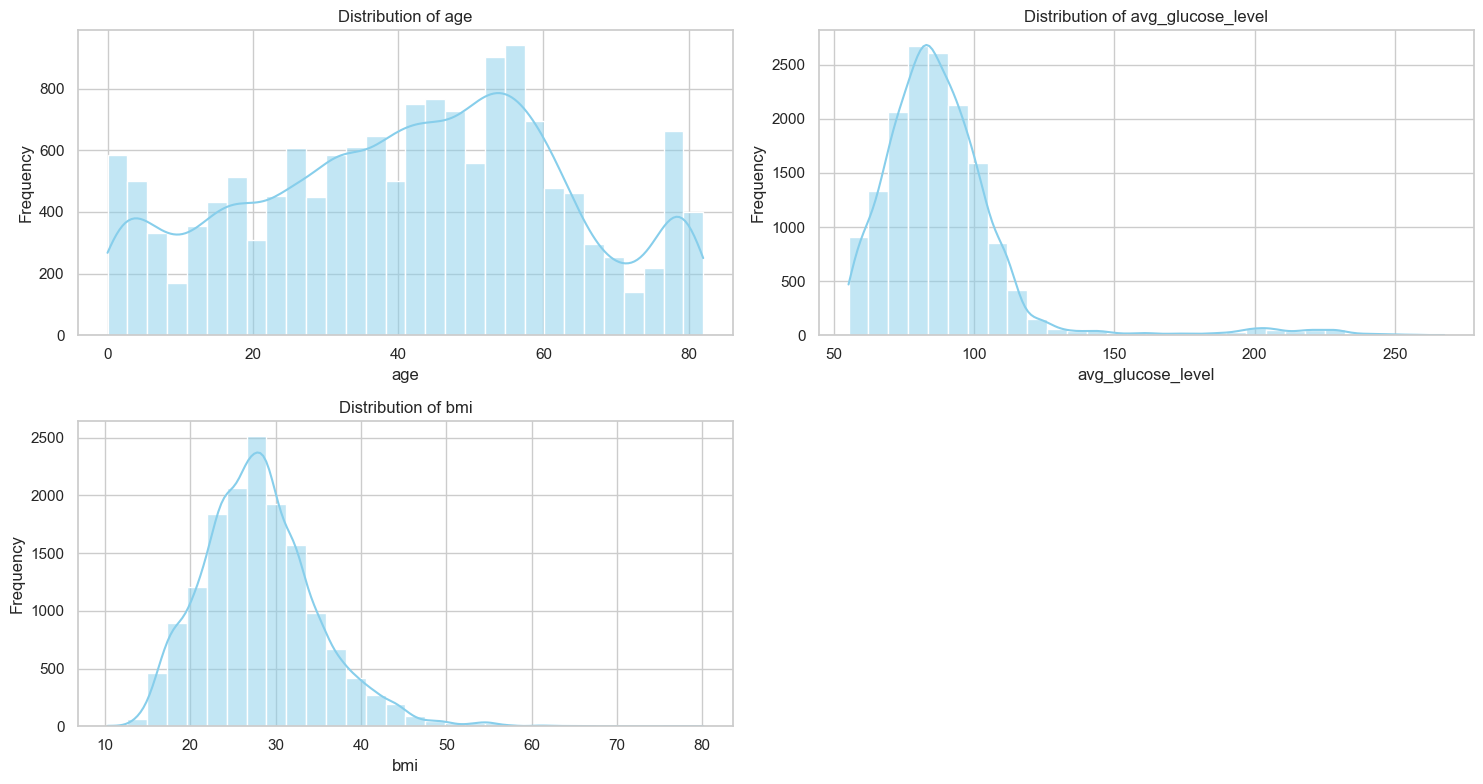

In [52]:
# Set the style for seaborn plots to "whitegrid" for better visualization
sns.set(style="whitegrid")

# Specify the numerical features to analyze
numerical_features = ['age', 'avg_glucose_level', 'bmi']

# Define a function to plot distributions of numerical features
def plot_numerical_distributions(data, columns):
    """
    Plots the distribution of numerical features using histograms with a KDE overlay.
    
    Parameters:
    - data: The DataFrame containing the data.
    - columns: List of numerical columns to plot.
    
    The function creates a grid of subplots (2 rows and 2 columns) and visualizes
    the distribution of each numerical feature in the list.
    """
    plt.figure(figsize=(15, 8))  # Set the figure size
    for i, column in enumerate(columns, 1):  # Enumerate through columns starting at index 1
        plt.subplot(2, 2, i)  # Create a subplot in a 2x2 grid
        sns.histplot(data[column], kde=True, color="skyblue", bins=30)  # Plot histogram with KDE
        plt.title(f"Distribution of {column}")  # Set title for the subplot
        plt.xlabel(column)  # Label x-axis
        plt.ylabel("Frequency")  # Label y-axis
    plt.tight_layout()  # Adjust layout for better fit
    plt.show()  # Display the plot

# Call the function to plot distributions for specified numerical features
plot_numerical_distributions(train_df, numerical_features)

In [53]:
# Generate a numerical summary for the specified features
numerical_summary = train_df[numerical_features].describe()

# Display the summary
print("Numerical Summary of Features:")
print(numerical_summary)


Numerical Summary of Features:
                age  avg_glucose_level           bmi
count  15304.000000       15304.000000  15304.000000
mean      41.404012          89.039853     28.112721
std       21.470463          25.476102      6.722315
min        0.000000          55.220000     10.300000
25%       26.000000          74.900000     23.500000
50%       43.000000          85.120000     27.600000
75%       57.000000          96.980000     32.000000
max       82.000000         267.600000     80.100000


#### Insights from Numerical Summary:
**Age:**

    The dataset contains 15,304 entries for the age feature, with an average age of 41.4 years.
    The age distribution has a standard deviation of 21.47 years, indicating a wide age range among participants.
    The minimum recorded age is 0, which might include infants, and the maximum age is 82 years.
    Quartiles suggest that 50% of participants are between 26 and 57 years, with a median age of 43 years.
**Average Glucose Level:**

    The average glucose level is 89.04 mg/dL, with a standard deviation of 25.48 mg/dL, indicating some variability in glucose levels.
    The minimum glucose level is 55.22 mg/dL, while the maximum is a significantly high 267.6 mg/dL, which could represent outliers or individuals with medical conditions like diabetes.
    Most participants have glucose levels in the range of 74.9 to 96.98 mg/dL, as indicated by the interquartile range (IQR).


**A healthy (normal) fasting blood glucose level for someone without diabetes is 70 to 99 mg/dL (3.9 to 5.5 mmol/L). Values between 50 and 70 mg/dL (2.8 to 3.9 mmol/L) for people without diabetes can be “normal” too.
If your fasting blood glucose level is 100 to 125 mg/dL (5.6 to 6.9 mmol/L), it usually means you have prediabetes. People with prediabetes have up to a 50% chance of developing Type 2 diabetes over the next five to 10 years. But you can take steps to prevent Type 2 diabetes from developing.If your fasting blood glucose level is 126 mg/dl (7.0 mmol/L) or higher on more than one testing occasion, it usually means you have diabetes.**

**BMI (Body Mass Index):**

    The average BMI is 28.11, which falls into the "overweight" category according to standard BMI classifications.
    The standard deviation is 6.72, showing moderate variation in BMI values.
    The BMI ranges from 10.3 (potentially an outlier or underweight individual) to 80.1 (likely indicating severe obesity).
    Half the participants have a BMI between 23.5 and 32.0, with a median BMI of 27.6.

    A healthy body mass index (BMI) for adults is generally between 18.5 and 24.9: 
    Under 18.5: You are underweight and may be malnourished
    18.5 to 24.9: You have a healthy weight
    25 to 29.9: You are overweight
    30 or higher: You are obese
    
#### 1. Understanding Risk Factors:

    Age: With a wide age range and a median age of 43, stroke risks can be assessed across different age groups. Older participants (above 57) may have higher risks, aligning with medical studies showing stroke prevalence increases with age.
    Average Glucose Level: Elevated glucose levels (e.g., values near or above 267.6 mg/dL) may indicate conditions like diabetes, a known stroke risk factor. This helps target high-risk groups for interventions.
    BMI: The overweight average BMI (28.11) highlights the need to focus on obesity's role in stroke occurrence. Extremely high BMI values may indicate participants prone to comorbidities that increase stroke risks.
#### 2. Identifying Outliers:
Outliers in glucose levels and BMI can be analyzed further to understand extreme cases and their relationship with stroke, potentially improving the model's predictions for edge cases.
#### 3. Targeted Interventions:
The analysis highlights specific demographics (e.g., older, high glucose, and high BMI individuals) who could benefit from proactive healthcare measures, like lifestyle changes or medical monitoring.

In [54]:
# Define the categorical features to analyze
categorical_features = ['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']

# Specify the target variable for the dataset
target = 'stroke'

In [55]:
# Check the distribution of the target variable (stroke cases)
train_df['stroke'].value_counts()

stroke
0    14672
1      632
Name: count, dtype: int64

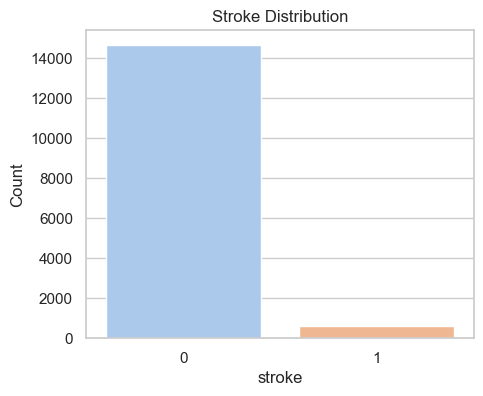

In [56]:
# Plot the distribution of the target variable using a count plot
plt.figure(figsize=(5, 4))
sns.countplot(data=train_df, x='stroke', hue='stroke', palette='pastel', dodge=False, legend=False)
plt.title('Stroke Distribution')
plt.ylabel('Count')
plt.show()

In [57]:
# Display value counts for each categorical feature in a summarized way
for feature in categorical_features:
    print(f"Counts for {feature}:")
    print(train_df[feature].value_counts())
    print()

Counts for gender:
gender
Female    9446
Male      5857
Other        1
Name: count, dtype: int64

Counts for ever_married:
ever_married
Yes    10385
No      4919
Name: count, dtype: int64

Counts for work_type:
work_type
Private          9752
children         2038
Self-employed    1939
Govt_job         1533
Never_worked       42
Name: count, dtype: int64

Counts for Residence_type:
Residence_type
Rural    7664
Urban    7640
Name: count, dtype: int64

Counts for smoking_status:
smoking_status
never smoked       6281
Unknown            4543
formerly smoked    2337
smokes             2143
Name: count, dtype: int64



### Insights for Stakeholders:
**Gender:**

    Female: 9,446 (61.6%)
    Male: 5,857 (38.3%)
    Other: 1 (0.01%)
    
The dataset shows a higher number of females compared to males, but the presence of a single "Other" entry suggests that gender data should be cleaned further for consistency.

**Ever Married:**

    Yes: 10,385 (67.9%)
    No: 4,919 (32.1%)
    
A majority of participants have been married (67.9%), which could be linked to factors such as family history or stress levels, both of which can impact stroke risk.

**Work Type:**

    Private: 9,752 (63.7%)
    Children: 2,038 (13.3%)
    Self-employed: 1,939 (12.7%)
    Govt_job: 1,533 (10.0%)
    Never_worked: 42 (0.3%)
    
The largest group is employed in private sector jobs, followed by children (likely affecting the analysis of workforce-related health risks), with very few participants labeled as "Never_worked."

**Residence Type:**

    Rural: 7,664 (50.1%)
    Urban: 7,640 (49.9%)
    
The distribution between rural and urban residents is nearly equal, providing insights into geographic disparities in stroke risk.

**Smoking Status:**

    Never smoked: 6,281 (41.1%)
    Unknown: 4,543 (29.7%)
    Formerly smoked: 2,337 (15.3%)
    Smokes: 2,143 (14.0%)
    
Smoking is a significant risk factor for stroke, and the data indicates that a large proportion of participants either never smoked or have quit, while a significant number are still active smokers or have an unknown status.

#### How This Helps Our Problem:
    Gender: Understanding gender differences can help improve the model by considering potential variations in stroke risk between males and females.
    Marital Status: Marital status can influence lifestyle factors like stress and social support, which affect stroke risk, thus improving prediction accuracy.
    Work Type: Employment status can impact stress, healthcare access, and lifestyle, helping identify at-risk groups in specific job sectors.
    Residence Type: Knowing whether a person lives in a rural or urban area can reveal geographic differences in stroke risk and healthcare access.
    Smoking Status: Smoking is a known risk factor, so analyzing smoking habits will help predict stroke likelihood, especially for current and former smokers.

In [58]:
# Drop rows where the gender is labeled as 'Other' in both train and test datasets
train_df['gender'].drop(train_df[train_df['gender'] == 'Other'].index, inplace=True)
test_df['gender'].drop(test_df[test_df['gender'] == 'Other'].index, inplace=True)

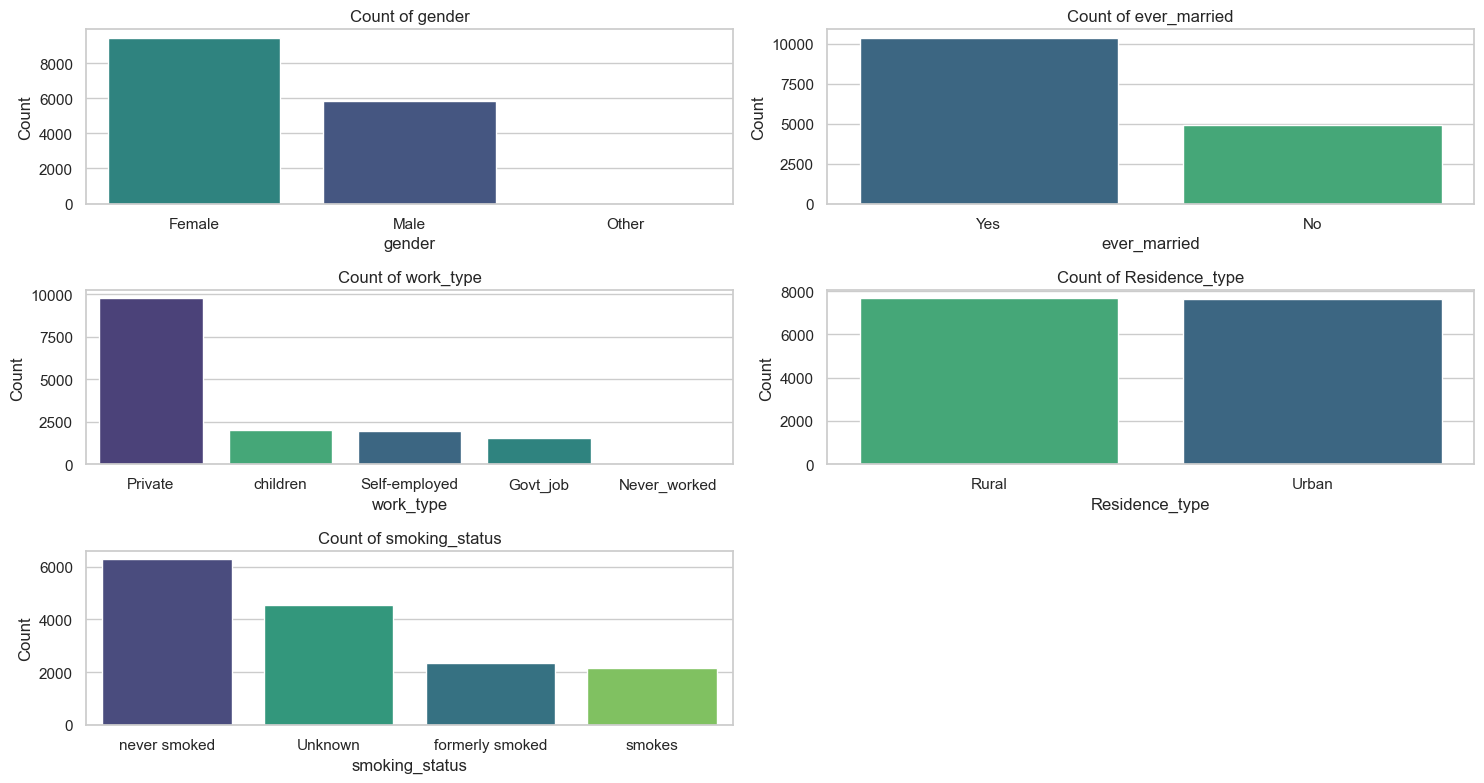

In [59]:
# Function to plot counts of categorical features
def plot_categorical_counts(data, columns):
    """
    Plots the count of categorical features using bar plots.
    
    Parameters:
    - data: The DataFrame containing the data.
    - columns: List of categorical columns to plot.
    
    The function creates a grid of subplots to visualize the count of each category in the features.
    """
    plt.figure(figsize=(15, 8))  # Set the figure size
    for i, column in enumerate(columns, 1):  # Enumerate through columns starting at index 1
        plt.subplot(3, 2, i)  # Create a subplot in a 3x2 grid
        sns.countplot(
            data=data, 
            x=column, 
            hue=column, 
            palette="viridis", 
            order=data[column].value_counts().index
        )  # Plot count with categories ordered by frequency
        plt.title(f"Count of {column}")  # Set title for the subplot
        plt.xlabel(column)  # Label x-axis
        plt.ylabel("Count")  # Label y-axis
    plt.tight_layout()  # Adjust layout for better fit
    plt.show()  # Display the plots

# Call the function to plot counts of the specified categorical features
plot_categorical_counts(train_df, categorical_features)

##### =======================
##### Bivariate Analysis
##### =======================

In [60]:
def analyze_feature_vs_target(data, numerical_features, categorical_features, target):
    """
    Analyzes relationships between features and the target variable numerically.
    
    Parameters:
    - data: pandas DataFrame containing the dataset.
    - numerical_features: List of numerical feature names to analyze.
    - categorical_features: List of categorical feature names to analyze.
    - target: Name of the target variable.
    
    Outputs:
    - Summary statistics for numerical features by target.
    - Frequency distribution for categorical features by target.
    """
    
    # Analyze Numerical Features
    print("Numerical Features Analysis:\n")
    for column in numerical_features:
        print(f"--- {column} vs {target} ---")
        summary = data.groupby(target)[column].describe()  # Group by target and describe statistics
        print(summary)
        print("\n")
    
    # Analyze Categorical Features
    print("Categorical Features Analysis:\n")
    for column in categorical_features:
        print(f"--- {column} vs {target} ---")
        frequency = data.groupby([column, target]).size().unstack(fill_value=0)  # Frequency distribution
        print(frequency)
        print("\n")

# Example Usage:
analyze_feature_vs_target(train_df, numerical_features, categorical_features, target)

Numerical Features Analysis:

--- age vs stroke ---
          count       mean        std   min   25%   50%   75%   max
stroke                                                             
0       14672.0  40.240390  21.022705   0.0  25.0  42.0  56.0  82.0
1         632.0  68.417722  11.904115  10.0  59.0  71.0  79.0  82.0


--- avg_glucose_level vs stroke ---
          count        mean        std    min    25%    50%       75%    max
stroke                                                                      
0       14672.0   88.250602  23.447153  55.22  74.81  85.03   96.6900  267.6
1         632.0  107.362468  51.060991  56.11  76.11  89.97  106.0425  267.6


--- bmi vs stroke ---
          count       mean       std   min   25%   50%   75%   max
stroke                                                            
0       14672.0  28.021489  6.749056  10.3  23.4  27.5  31.9  80.1
1         632.0  30.230696  5.674430  15.5  26.7  29.4  33.3  60.9


Categorical Features Analysis:

--- 

### Insights from Analysis

**Numerical Features:**

    Age: Stroke cases have a much higher mean age (68.4) than non-stroke cases (40.2), with 75% of strokes occurring in individuals aged 59 or above.
    Age: Older individuals are at a much higher risk of strokes. The average age of stroke cases is significantly higher, indicating age as a critical factor in predicting stroke.
    
    Glucose Levels: Stroke cases show higher average glucose levels (107.4) than non-stroke cases (88.3), indicating glucose as a potential risk factor.
    Glucose Levels: Elevated glucose levels are more common in stroke cases, suggesting that glucose control may play a role in stroke prevention.
    
    BMI: Individuals with strokes have a slightly higher mean BMI (30.2) compared to non-stroke cases (28.0), showing a modest association with strokes.
    BMI: Higher BMI shows a mild association with stroke, implying that weight management could be relevant but is not as strong a factor as age or glucose levels.

**Categorical Features:**

    Gender: More females experienced strokes (368 cases) than males (264 cases).
    Marital Status: Stroke cases are predominantly among married individuals (591 cases), likely influenced by age.
    Work Type: Most strokes occurred in private-sector workers (404 cases), followed by self-employed individuals (158 cases).
    Residence Type: Strokes are evenly distributed between rural (317) and urban (315) residents.
    Smoking Status: Smoking (current or past) is associated with a higher occurrence of strokes, though significant cases are also found in "never smoked" and "unknown" groups.


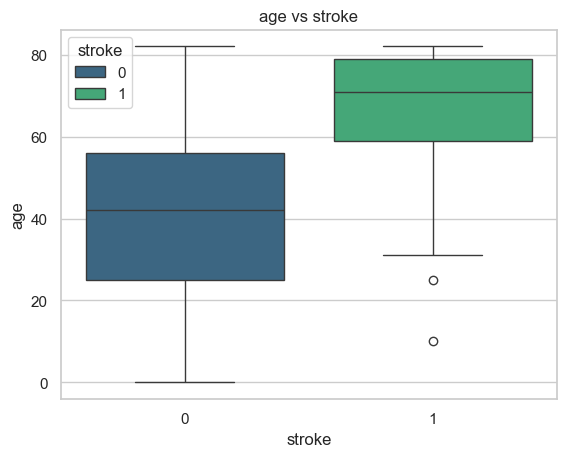

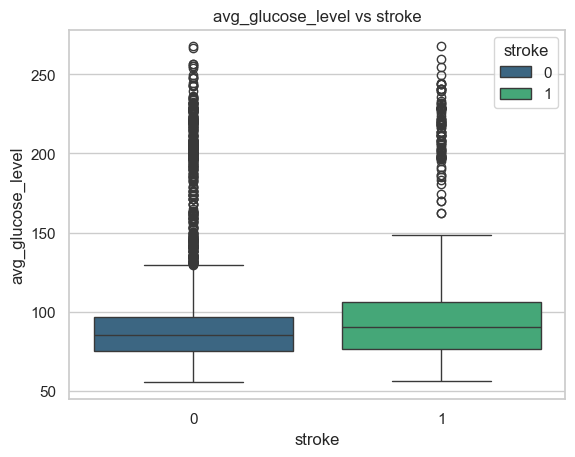

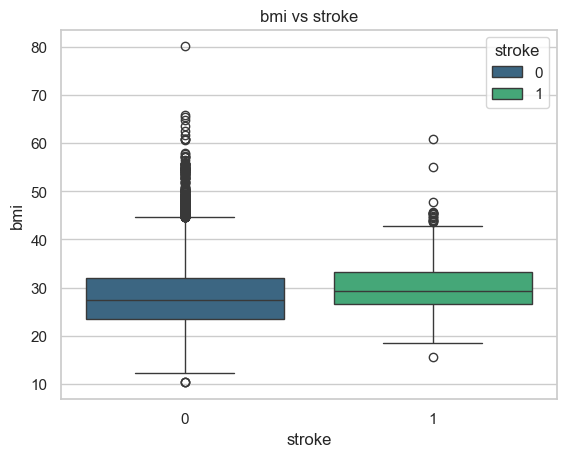

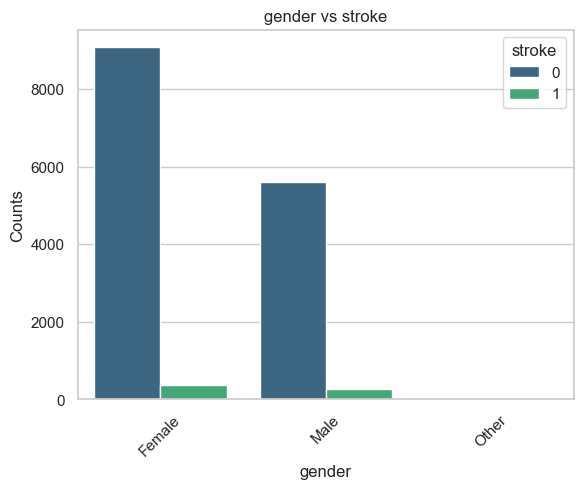

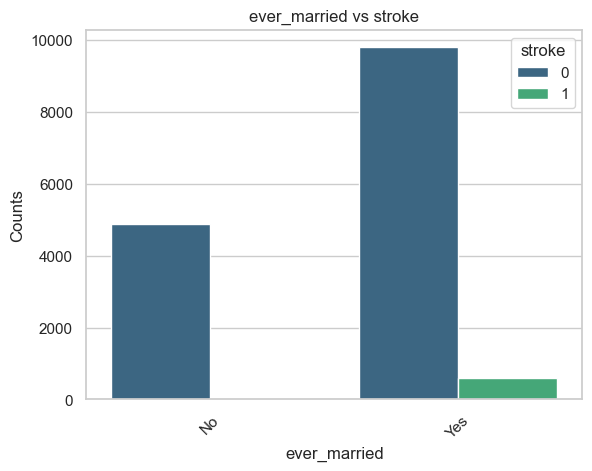

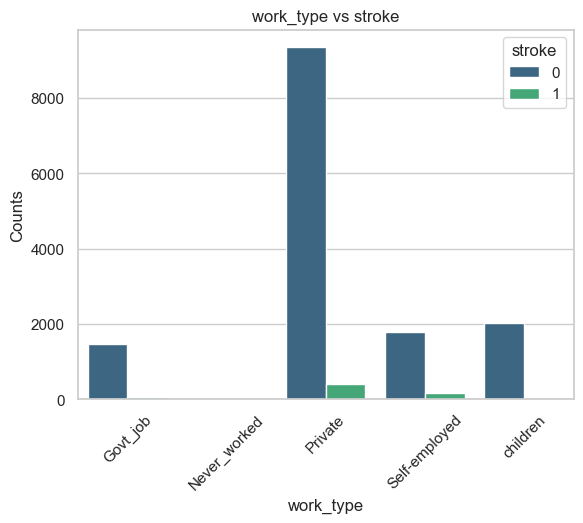

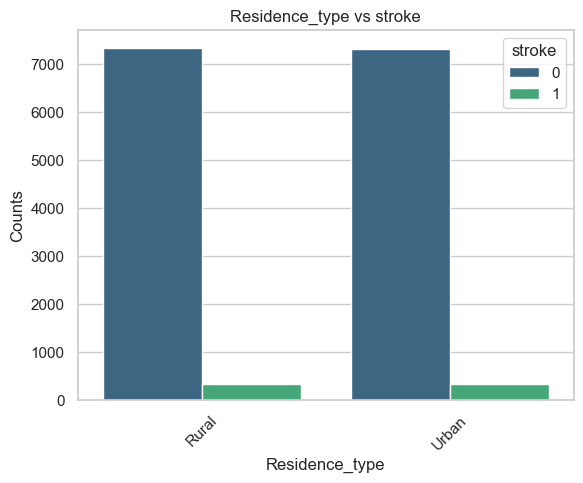

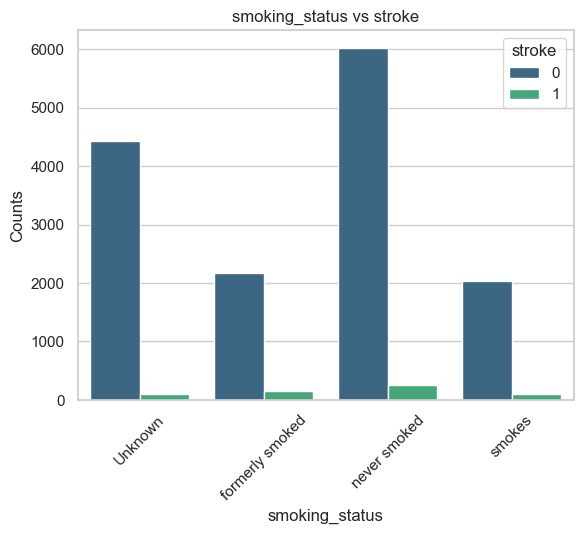

In [61]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_feature_vs_target(data, numerical_features, categorical_features, target):
    """
    Plots the relationships between numerical/categorical features and the target variable.

    Parameters:
    - data: pandas DataFrame containing the dataset.
    - numerical_features: List of numerical feature names to plot.
    - categorical_features: List of categorical feature names to plot.
    - target: Name of the target variable.
    """
    
    def plot_numerical():
        """
        Plots boxplots for numerical features against the target variable.
        Each feature is displayed in a separate figure.
        """
        for column in numerical_features:
            sns.boxplot(x=target, y=column, data=data,hue=target, palette="viridis")
            plt.title(f"{column} vs {target}")  # Set the title for the plot
            plt.xlabel(target)  # Label the x-axis
            plt.ylabel(column)  # Label the y-axis
            plt.show()  # Display the plot
    
    def plot_categorical():
        """
        Plots barplots for categorical features against the target variable.
        Aggregates data by counts and displays one feature per figure.
        """
        for column in categorical_features:
            # Group data by categorical feature and target variable, then count occurrences
            data_grouped = data.groupby([column, target]).size().reset_index(name="counts")
            sns.barplot(x=column, y="counts", hue=target, data=data_grouped, palette="viridis")
            plt.title(f"{column} vs {target}")  # Set the title for the plot
            plt.xlabel(column)  # Label the x-axis
            plt.ylabel("Counts")  # Label the y-axis
            plt.xticks(rotation=45)  # Rotate x-axis labels for readability
            plt.show()  # Display the plot

    # Plot numerical features vs target
    plot_numerical()  # Call the function to plot numerical features
    # Plot categorical features vs target
    plot_categorical()  # Call the function to plot categorical features

# Example Usage:
# train_df: pandas DataFrame with training data
# numerical_features: List of numerical column names
# categorical_features: List of categorical column names
# target: Target variable name
plot_feature_vs_target(train_df, numerical_features, categorical_features, target)


In [62]:
df=train_df

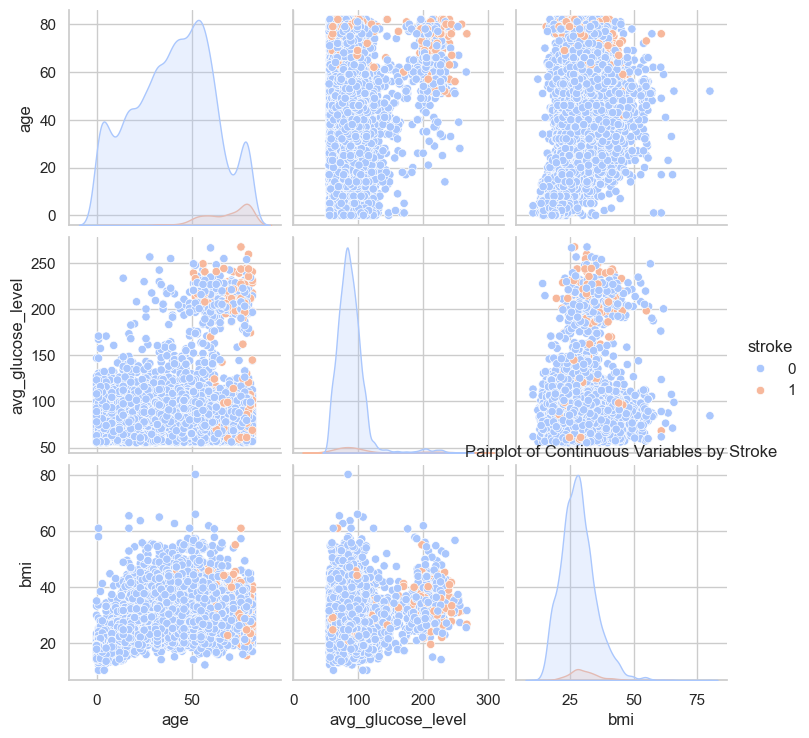

In [63]:
# 1. Pairplot to visualize pairwise relationships
sns.pairplot(df, vars=['age', 'avg_glucose_level', 'bmi'], hue='stroke', diag_kind='kde', palette='coolwarm')
plt.title("Pairplot of Continuous Variables by Stroke")
plt.show()

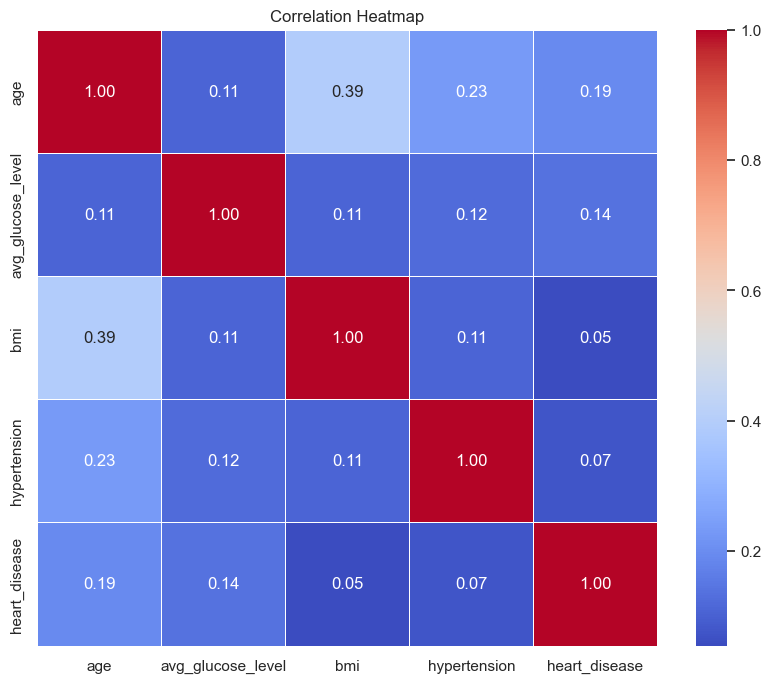

In [64]:
# 2. Correlation Heatmap for Numeric Variables
plt.figure(figsize=(10, 8))
correlation_matrix = df[['age', 'avg_glucose_level', 'bmi', 'hypertension', 'heart_disease']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

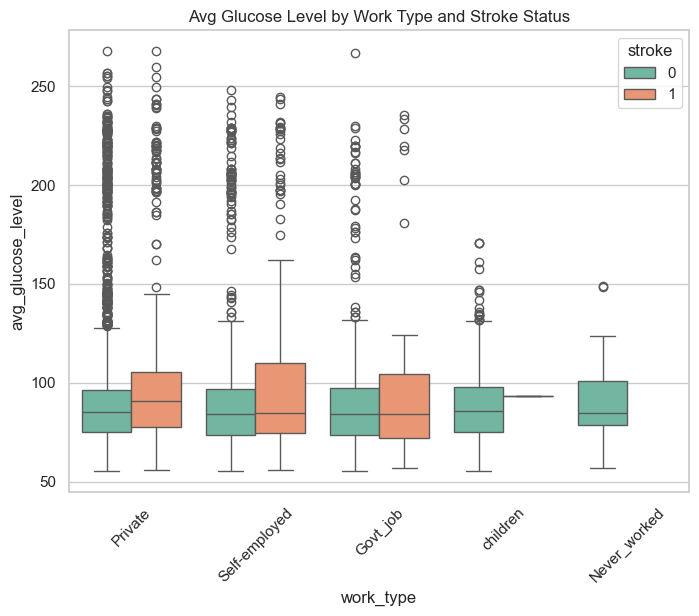

In [65]:
# 3. Boxplot for Categorical and Continuous Variables
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='work_type', y='avg_glucose_level', hue='stroke', palette='Set2')
plt.title("Avg Glucose Level by Work Type and Stroke Status")
plt.xticks(rotation=45)
plt.show()

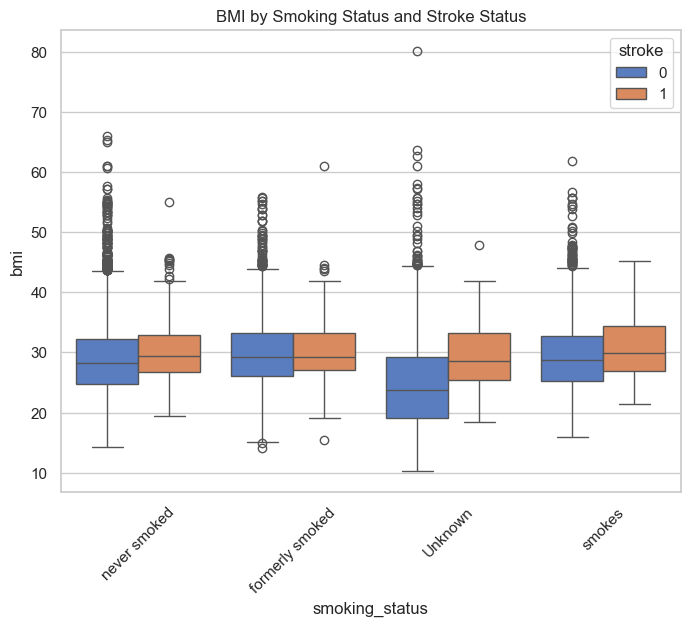

In [66]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='smoking_status', y='bmi', hue='stroke', palette='muted')
plt.title("BMI by Smoking Status and Stroke Status")
plt.xticks(rotation=45)
plt.show()

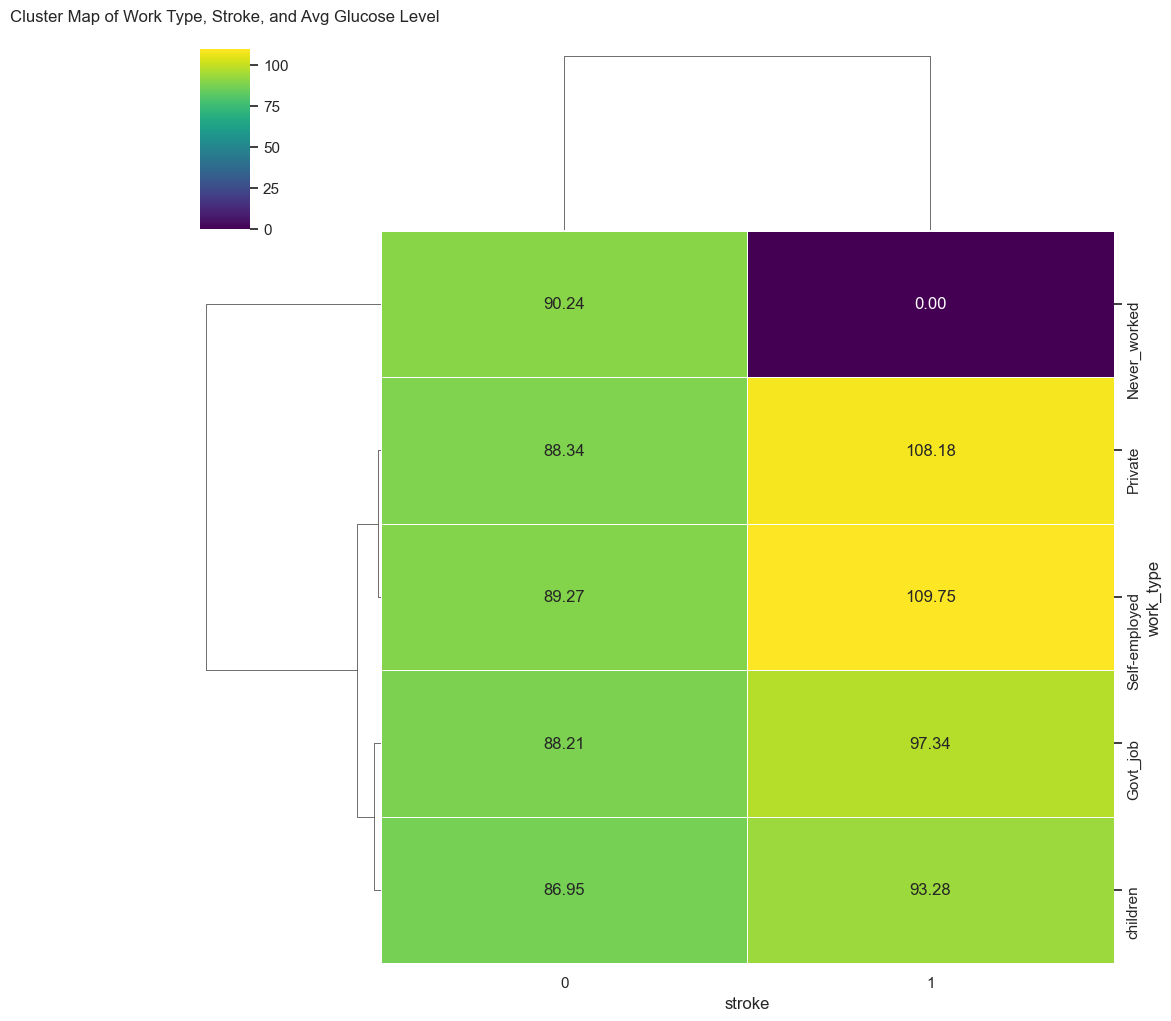

In [67]:
# 4. Cluster Map to visualize relationships between categories and numeric values
cluster_data = df.groupby(['work_type', 'stroke'])[['avg_glucose_level', 'bmi']].mean().reset_index()

# Correct usage of pivot and filling NaN values
pivot_cluster_data = cluster_data.pivot(index="work_type", columns="stroke", values="avg_glucose_level")

# Replace NaN values with a default value (e.g., 0)
pivot_cluster_data = pivot_cluster_data.fillna(0)

# Create a cluster map
sns.clustermap(pivot_cluster_data, cmap="viridis", annot=True, fmt=".2f", linewidths=0.5)

# Title should be set outside the clustermap
plt.title("Cluster Map of Work Type, Stroke, and Avg Glucose Level", pad=20)
plt.show()

### 4. Feature Engineering

In [92]:
# Set configuration to display pipelines for debugging purposes
set_config(display="diagram")

# Extract feature columns and target column from training dataset
input_cols = list(train_df.columns)[1:-1]  # All columns except 'id' and 'stroke'
target_col = 'stroke'  # Target variable

# Separate features (X) and target (y) for training
X = train_df[input_cols].copy()  # Copy of training features
y = train_df[target_col].copy()  # Copy of training target
Xtest = test_df[input_cols].copy()  # Features for the test dataset

# Separate numerical and categorical features
numerical_col = X.select_dtypes(include=np.number).columns.to_list()  # Columns with numerical data
categorical_col = X.select_dtypes(include="object").columns.to_list()  # Columns with categorical data

# Handle smoking_status column separately due to its ordinal nature
categorical_col.remove("smoking_status")

#### ========================
#### Define Encoders and Preprocessor
#### ========================

In [93]:
# Define encoders
ordinal_enc = OrdinalEncoder(categories=[["Unknown", "never smoked", "formerly smoked", "smokes"]])  # For smoking_status
onehot_enc = OneHotEncoder(handle_unknown='ignore')  # For other categorical columns

# Combine preprocessing steps into a pipeline
preprocessor = ColumnTransformer([
    ("Ordinal_Encoder", ordinal_enc, ["smoking_status"]),  # Ordinal encoding for smoking_status
    ("Onehot_Encoder", onehot_enc, categorical_col)  # One-hot encoding for remaining categorical columns
])

# Fit the preprocessor on the training data
preprocessor.fit(X)
encoded_cols = list(preprocessor.get_feature_names_out())  # Get names of the encoded columns

# Transform both training and test datasets
X_transformed = preprocessor.transform(X)
Xtest_transformed = preprocessor.transform(Xtest)

# Create final feature matrices with encoded and numerical columns
X_train = pd.DataFrame(X_transformed, columns=encoded_cols)  # Encoded training data
X_test = pd.DataFrame(Xtest_transformed, columns=encoded_cols)  # Encoded test data
X_train[numerical_col] = X[numerical_col].reset_index(drop=True)  # Add back numerical features
X_test[numerical_col] = Xtest[numerical_col].reset_index(drop=True)

In [94]:
X_train.head()

,Ordinal_Encoder__smoking_status,Onehot_Encoder__gender_Female,Onehot_Encoder__gender_Male,Onehot_Encoder__gender_Other,Onehot_Encoder__ever_married_No,Onehot_Encoder__ever_married_Yes,Onehot_Encoder__work_type_Govt_job,Onehot_Encoder__work_type_Never_worked,Onehot_Encoder__work_type_Private,Onehot_Encoder__work_type_Self-employed,Onehot_Encoder__work_type_children,Onehot_Encoder__Residence_type_Rural,Onehot_Encoder__Residence_type_Urban,age,hypertension,heart_disease,avg_glucose_level,bmi
0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,28,0,0,79.53,31.1
1,2.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,33,0,0,78.44,23.9
2,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,42,0,0,103.00,40.3
3,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,56,0,0,64.87,28.8
4,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,24,0,0,73.36,28.8


In [95]:
X_train.shape[1]==X_test.shape[1]

True

#### ========================
#### Train-Test Split and SMOTE
#### ========================

In [96]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y, test_size=0.2, random_state=42, stratify=y)

smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

print("Class Distribution after SMOTE:")
print(y_train_smote.value_counts())
print("\nFinal Processed Dataset Shapes:")
print(f"X_train: {X_train_smote.shape}, y_train: {y_train_smote.shape}")
print(f"X_val: {X_val.shape}, y_val: {y_val.shape}")

Class Distribution after SMOTE:
stroke
0    11737
1    11737
Name: count, dtype: int64

Final Processed Dataset Shapes:
X_train: (23474, 18), y_train: (23474,)
X_val: (3061, 18), y_val: (3061,)


## ========================
## 5. Model Building and Evaluation
## ========================

In [97]:
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Support Vector Machine (SVM)": SVC(probability=True, random_state=42),
    "K-Nearest Neighbors (KNN)": KNeighborsClassifier(),
    "Naive Bayes": GaussianNB(),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric="logloss", random_state=42)
}

#### ========================
#### Model Evaluation Functions
#### ========================

In [98]:
# Function to evaluate models and return metrics
def evaluate_model(model, X_train, y_train, X_val, y_val):
    model.fit(X_train, y_train)  # Train the model
    y_pred = model.predict(X_val)  # Predict on validation data
    return {
        "confusion_matrix": confusion_matrix(y_val, y_pred),
        "accuracy": accuracy_score(y_val, y_pred),
        "precision": precision_score(y_val, y_pred),
        "recall": recall_score(y_val, y_pred),
        "f1": f1_score(y_val, y_pred)
    }

# Function to calculate metrics for all models
def get_metrics(models, X_train, y_train, X_val, y_val):
    results = []  # Store evaluation metrics
    confusion_mats = {}  # Store confusion matrices

    for model_name, model in models.items():
        metrics = evaluate_model(model, X_train, y_train, X_val, y_val)
        confusion_mats[model_name] = metrics.pop("confusion_matrix")  # Extract confusion matrix
        results.append({"Model": model_name, **metrics})  # Add metrics to results

    return pd.DataFrame(results), confusion_mats  # Return metrics as a DataFrame and confusion matrices

# Evaluate all models
metrics_df, confusion_mats = get_metrics(models, X_train_smote, y_train_smote, X_val, y_val)
print(metrics_df.sort_values(by="recall", ascending=False))  # Sort by recall

C:\Users\User\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [13:36:51] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0ed59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


                          Model  accuracy  precision    recall        f1
6                   Naive Bayes  0.353806   0.055662  0.920635  0.104977
4  Support Vector Machine (SVM)  0.727213   0.120043  0.888889  0.211520
0           Logistic Regression  0.783731   0.133880  0.777778  0.228438
5     K-Nearest Neighbors (KNN)  0.826527   0.142857  0.642857  0.233766
3                 Decision Tree  0.925841   0.193939  0.253968  0.219931
2             Gradient Boosting  0.944136   0.285714  0.238095  0.259740
7                       XGBoost  0.953283   0.373134  0.198413  0.259067
1                 Random Forest  0.952957   0.250000  0.071429  0.111111


## 6. Insights and Visualizations

#### ========================
#### Plot Confusion Matrices
#### ========================

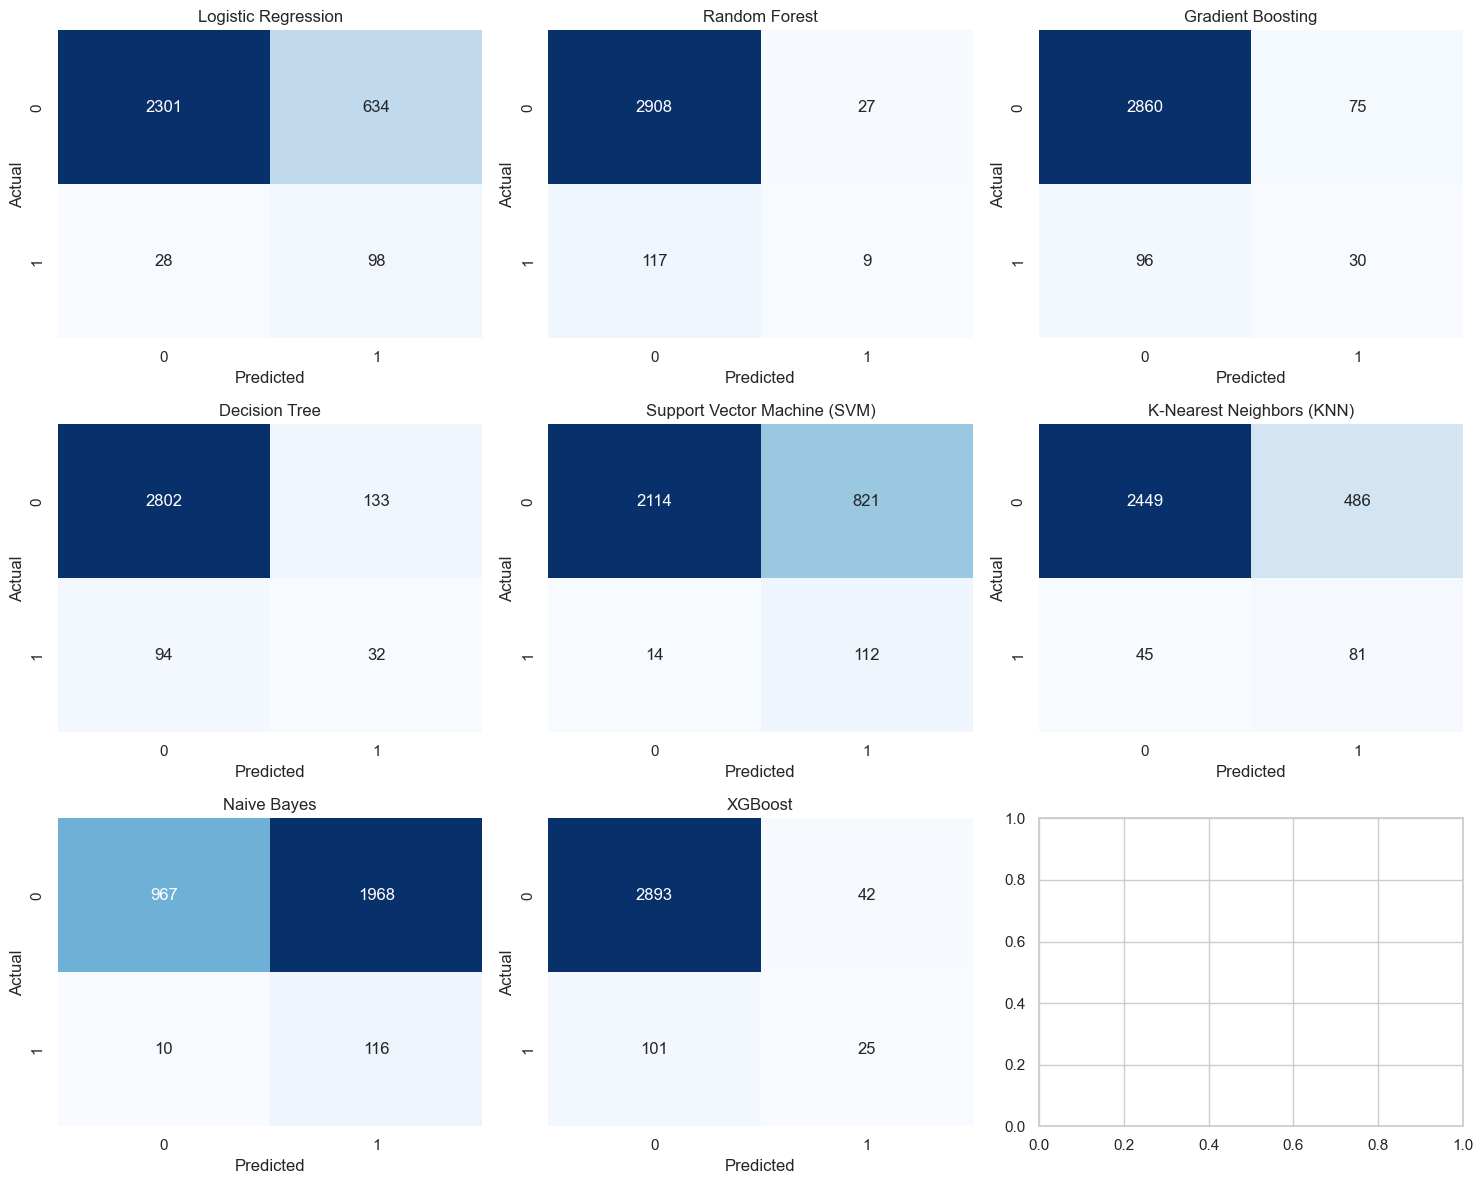

In [99]:
# Plot confusion matrices
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 12))
for ax, (model_name, cm) in zip(axes.ravel(), confusion_mats.items()):
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=ax, cbar=False)  # Plot heatmap
    ax.set_title(model_name)  # Add title
    ax.set_xlabel("Predicted")  # Add x-axis label
    ax.set_ylabel("Actual")  # Add y-axis label
plt.tight_layout()
plt.show()

#### ========================
#### Plot ROC Curves
#### ========================

C:\Users\User\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [13:43:11] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0ed59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


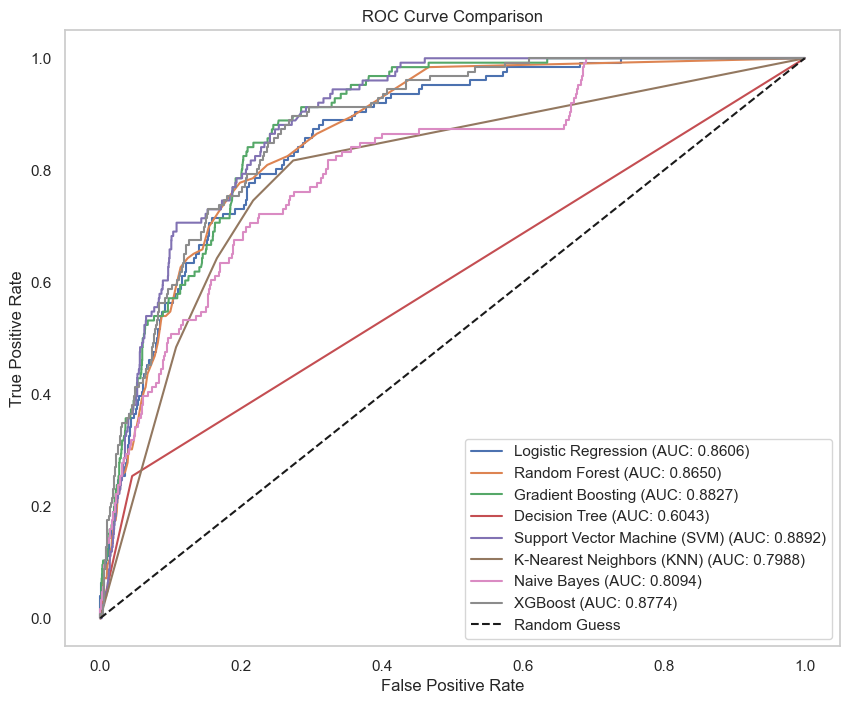

In [100]:
# Plot ROC curves
plt.figure(figsize=(10, 8))
for model_name, model in models.items():
    model.fit(X_train_smote, y_train_smote)  # Train model on resampled data
    y_prob = model.predict_proba(X_val)[:, 1]  # Get predicted probabilities
    fpr, tpr, _ = roc_curve(y_val, y_prob)  # Calculate ROC curve
    roc_auc = roc_auc_score(y_val, y_prob)  # Calculate AUC
    plt.plot(fpr, tpr, label=f"{model_name} (AUC: {roc_auc:.4f})")  # Plot ROC curve

plt.plot([0, 1], [0, 1], "k--", label="Random Guess")  # Diagonal line
plt.title("ROC Curve Comparison")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.grid()
plt.show()

#### ========================
#### Summarize AUC Scores
#### ========================

#### ========================
#### Save Model for Deployment
#### ========================

In [107]:
from sklearn.ensemble import RandomForestClassifier
import joblib

# Train the final model using Random Forest
final_model = RandomForestClassifier(n_estimators=100, random_state=42)  # Example: Random Forest Classifier
final_model.fit(X_train_smote, y_train_smote)  # Train on resampled data

# Save the preprocessor and trained model together for deployment
joblib.dump({
    'encoded_cols': encoded_cols, 
    'numeric_cols': numerical_col, 
    'preprocessor': preprocessor, 
    'model': final_model
}, 'model_rf.joblib')  # Save with a descriptive name

['model_rf.joblib']

#### ========================
#### Make Prediction on a Single Input for Testing
#### ========================

In [110]:
import joblib
import pandas as pd

# Load the saved model and preprocessor
model_data = joblib.load('model_rf.joblib')  # Load the dictionary

# Extract components
final_model = model_data['model']  # The trained model
preprocessor = model_data['preprocessor']  # The preprocessor
encoded_cols = model_data['encoded_cols']  # Encoded column names
numerical_col = model_data['numeric_cols']  # Numerical column names

# Example single input for prediction
single_input = {
    'gender': 'Male', 
    'age': 33, 
    'hypertension': 0,
    'heart_disease': 0, 
    'ever_married': 'Yes',
    'work_type': 'Private',
    'Residence_type': 'Urban',
    'avg_glucose_level': 79.53,
    'bmi': 31.10,
    'smoking_status': 'formerly smoked'
}

# Create a DataFrame for the single input
input_df = pd.DataFrame([single_input])  

# Transform the input data using the preprocessor
input_transformed = preprocessor.transform(input_df)

# Convert the transformed data to a DataFrame with the correct column names
input_transformed_df = pd.DataFrame(input_transformed, columns=encoded_cols)

# Add the numerical columns back to the DataFrame
for col in numerical_col:
    input_transformed_df[col] = input_df[col].values

# Align input feature order to match model training data
input_transformed_df = input_transformed_df[final_model.feature_names_in_]

# Make a prediction using the final trained model
prediction = final_model.predict(input_transformed_df)

print("Prediction for single input:", prediction)

Prediction for single input: [0]


In [111]:
# Get class probabilities
probabilities = final_model.predict_proba(input_transformed_df)
threshold = 0.5
predicted_class = 1 if probabilities[0, 1] > threshold else 0
print("Final classification:", predicted_class)

Final classification: 0
